## Exploratory Data Analysis

### Introduction About the Data :

A Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban and rural areas. The customer first applies for a home loan after that company validates the customer's eligibility for a loan.

The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling out the online application form.To automate this process, they have given a problem identifying the customer segments eligible for loan amounts to target these customers specifically. Here they have provided a partial data set. Here is the details of the dataset features:

* `Loan_ID` : Unique Loan ID (created by the system)
* `Gender` : Male/Female
* `Married` : Applicant married (Y/N)
* `Dependents` : Number of dependents
* `Education` : Applicant Education (Graduate/Under Graduate)
* `Self_Employed` : Self-employed (Y/N)
* `ApplicantIncome` : Applicant's income
* `CoapplicantIncome` : Co-applicant income
* `LoanAmount` : Loan amount in thousands
* `Loan_Amount_Term` : Term of the loan in months
* `Credit_History` : Credit history of customer
* `Property_Area` : Rural/Urban

Target variable:
* `Loan_Status`: Customer loan eligibility

Dataset Source Link :
[https://www.kaggle.com/datasets/rishikeshkonapure/home-loan-approval?select=loan_sanction_train.csv](https://www.kaggle.com/datasets/rishikeshkonapure/home-loan-approval?select=loan_sanction_train.csv)

In [1]:
import os
os.chdir('../')
%pwd

'/home/utpal108/dev/Python/PW_Skills_Projects/Home-Loan-Approval-Prediction'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from homeLoan.constants import *
from homeLoan.utils import read_yaml

In [3]:
config = read_yaml(CONFIG_FILE_PATH)

2023-12-02 23:02:45,987 : homeLoan.logger - INFO - YAML file: config/config.yaml loaded successfully


In [4]:
# Load the dataset
raw_data_path = config.data_ingestion.raw_data_path
df = pd.read_csv(raw_data_path)
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [5]:
# Shape of the dataset
df.shape

(614, 13)

In [6]:
# Check if any null values are present
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
df['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [7]:
# Check the data types of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
# Check the duplicate records
df.duplicated().sum()

0

In [9]:
df['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

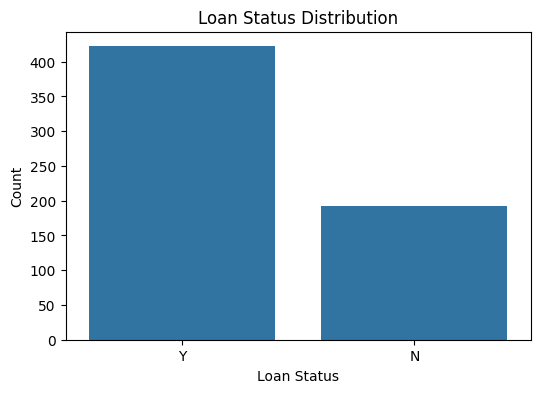

In [10]:
# Visualize Class Distributation For Loan_Status
plt.figure(figsize=(6,4))
sns.countplot(x='Loan_Status', data=df)
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

In [11]:
# Here we don't use Loan_ID, so I will remove it from the dataset
df = df.drop(labels=['Loan_ID'], axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
# Segregate Numerical and Categorical Column
numerical_columns = [column for column in df.columns if df[column].dtype != 'object']
categorical_columns = [column for column in df.columns if column != 'Loan_Status' and df[column].dtype == 'object']

In [13]:
numerical_columns

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [14]:
categorical_columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

#### EDA For Categorical Columns

In [15]:
# Info of the categorical columns
df[categorical_columns].describe()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
count,601,611,599,614,582,614
unique,2,2,4,2,2,3
top,Male,Yes,0,Graduate,No,Semiurban
freq,489,398,345,480,500,233


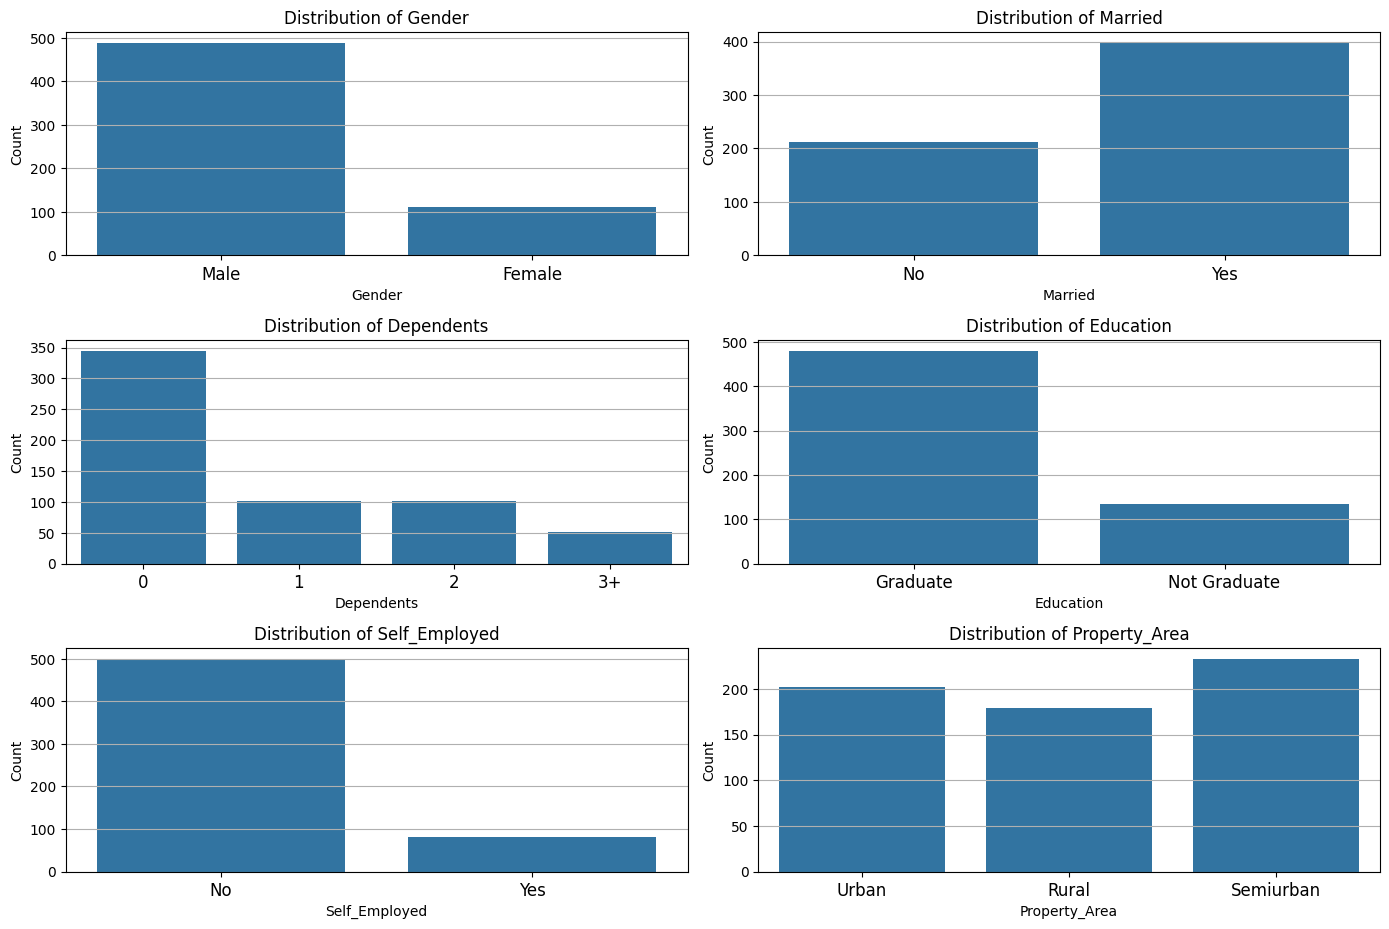

In [16]:
# Categorical columns count visualization
plt.figure(figsize=(14,12))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4,2,i)
    plt.grid(True)
    sns.countplot(x=column, data=df)
    plt.xticks(fontsize=12)
    plt.xlabel(f'{column}')
    plt.ylabel('Count')
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

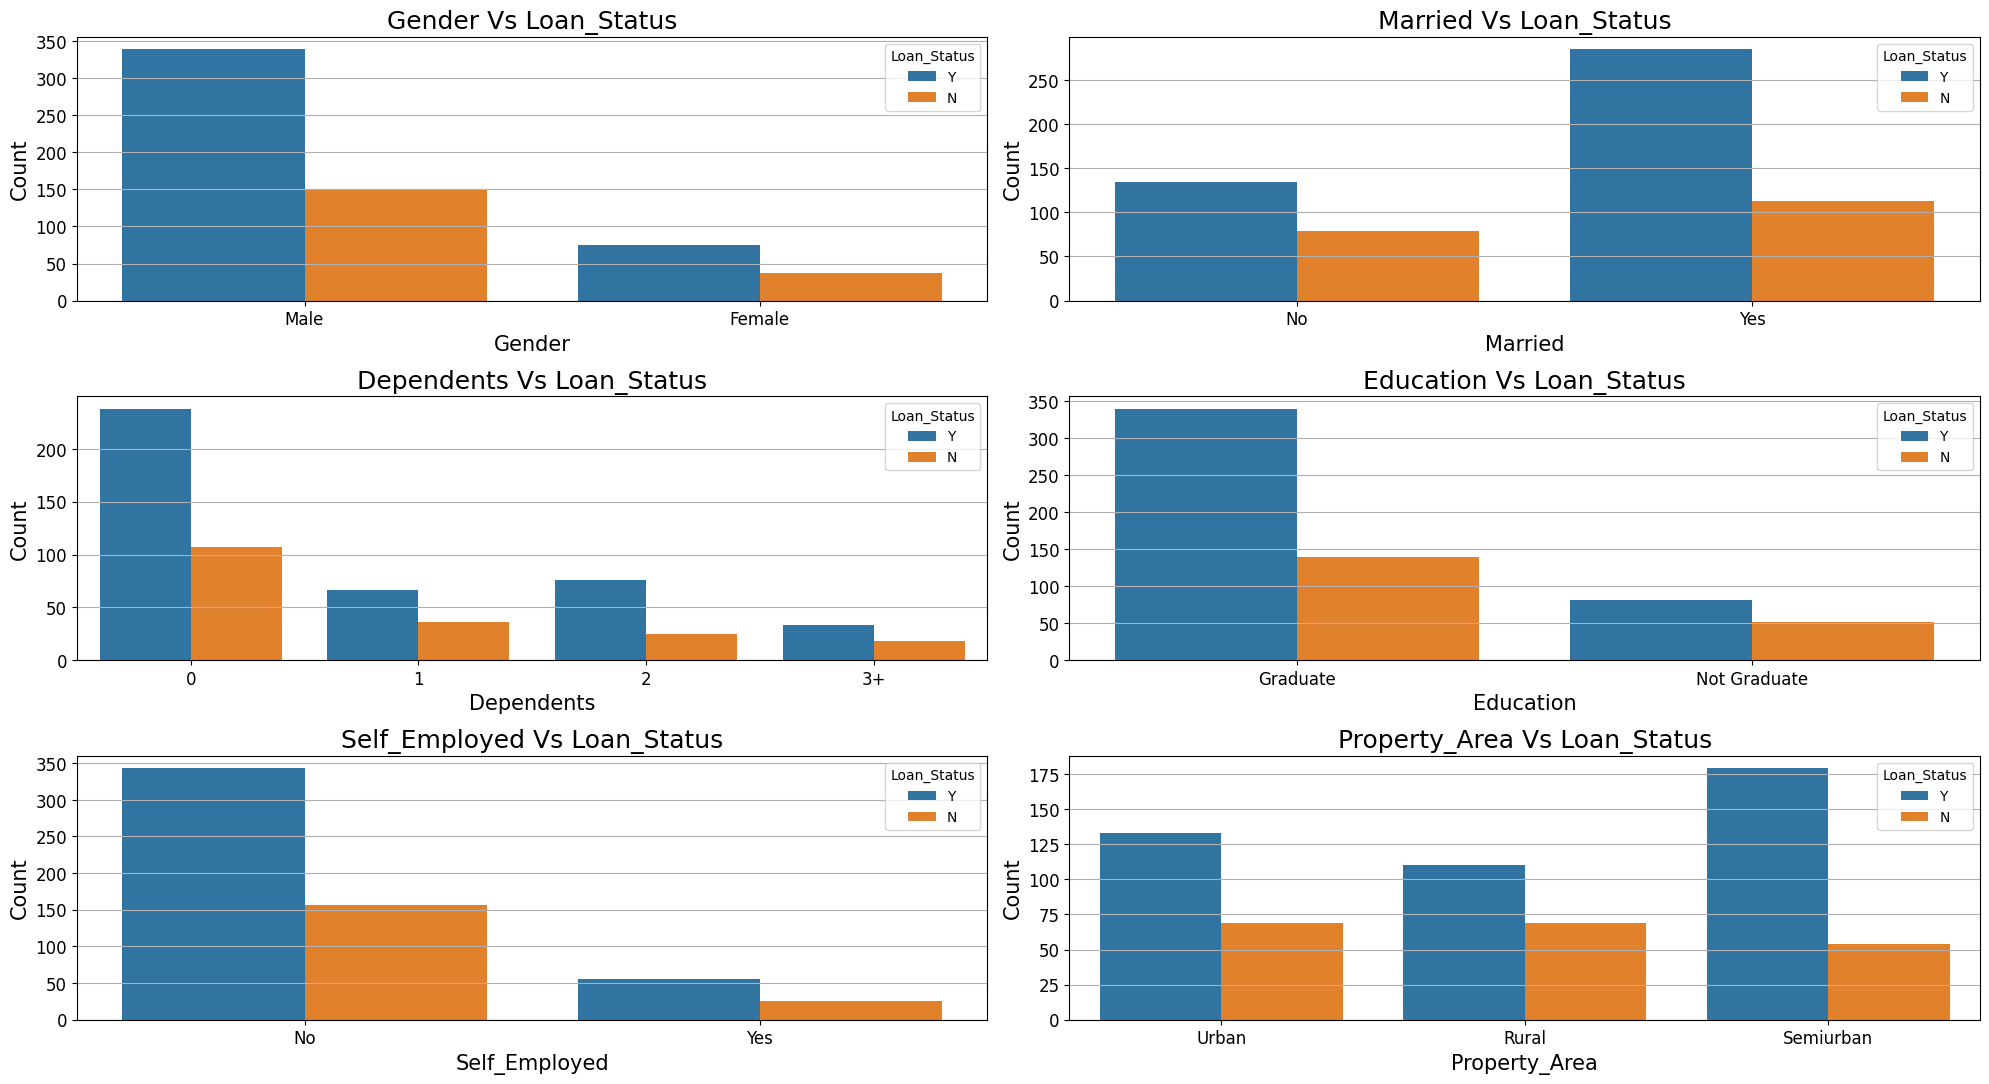

In [17]:
plt.figure(figsize=(20,14))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4,2,i)
    plt.grid(True)
    sns.countplot(x=column, data=df, hue='Loan_Status')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(f'{column}', fontsize=15)
    plt.ylabel('Count', fontsize=15)
    plt.title(f'{column} Vs Loan_Status', fontsize=18)

plt.tight_layout()
plt.show()

#### EDA For Numerical Columns

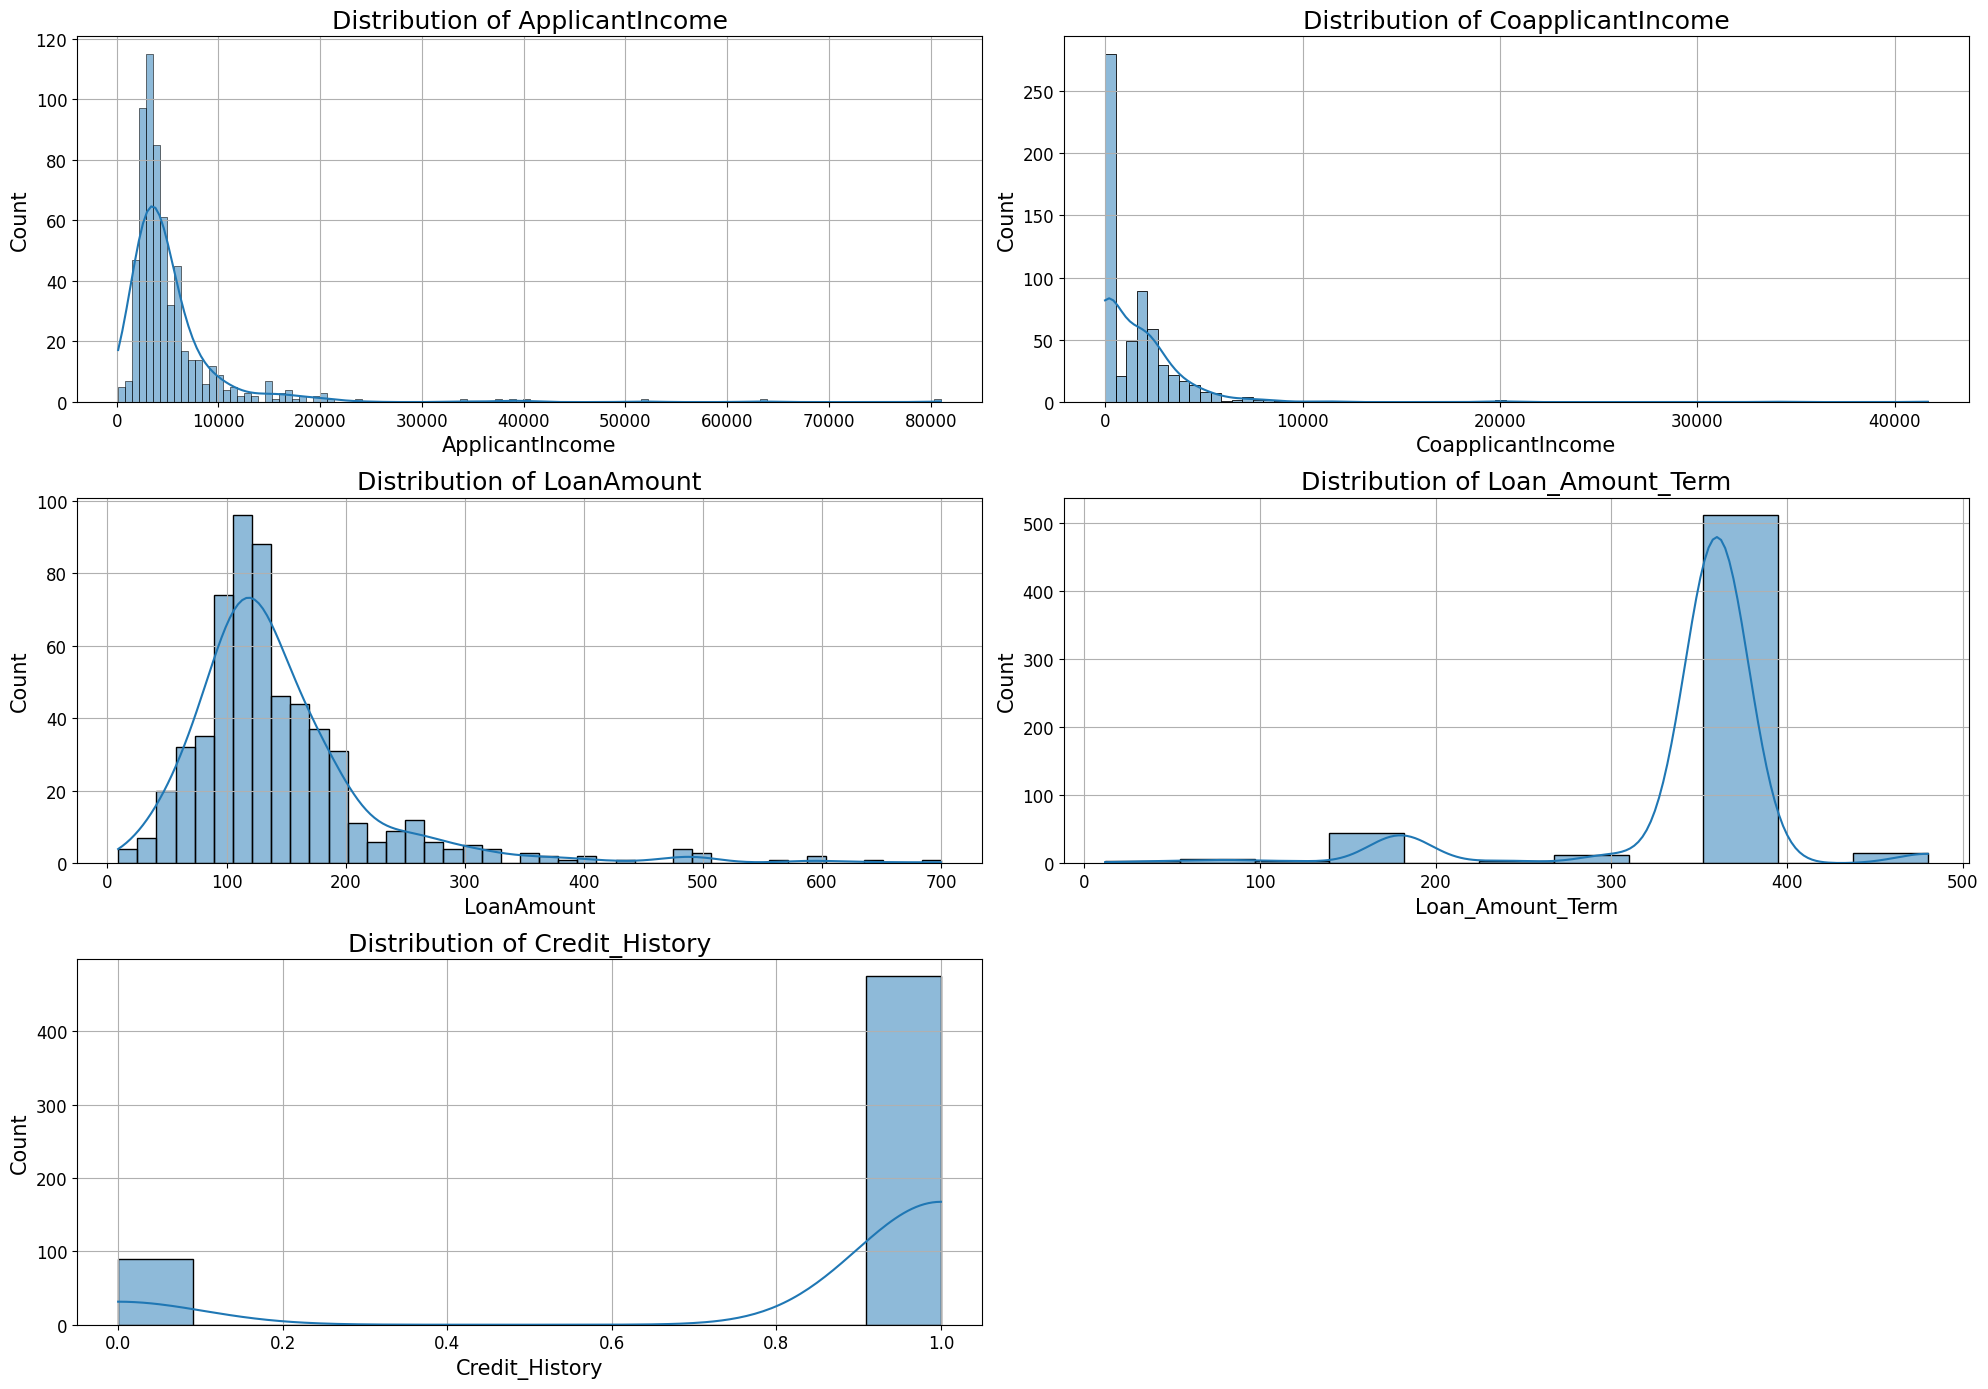

In [18]:
# Plot Histogram to show the distribution of the numerical data
plt.figure(figsize=(20,14))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3,2,i)
    plt.grid(True)
    sns.histplot(data=df,x=column, kde=True, fill=True)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(f'{column}', fontsize=15)
    plt.ylabel('Count', fontsize=15)
    plt.title(f'Distribution of {column}', fontsize=18)

plt.tight_layout()
plt.show()


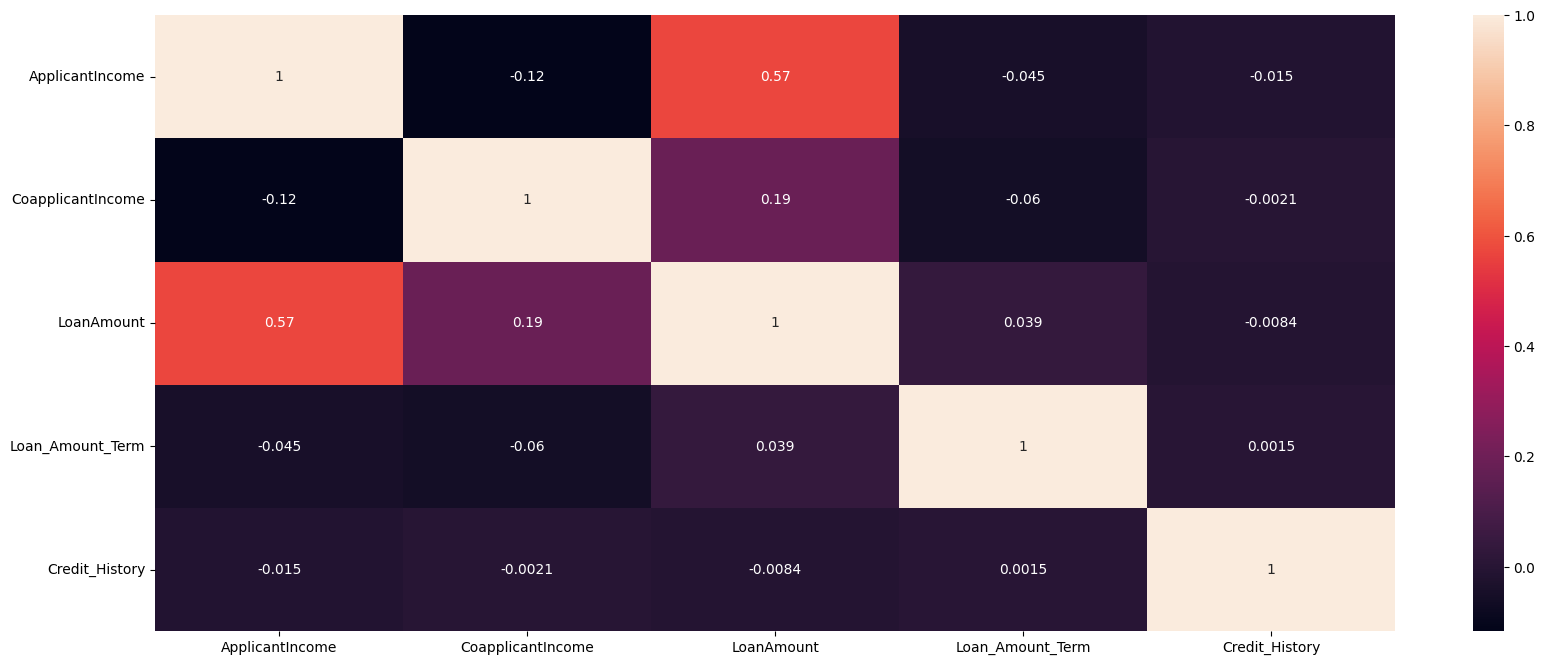

In [19]:
# Now we will find the relationship within the numerical feature using heatmap
plt.figure(figsize=(20,8))
sns.heatmap(df[numerical_columns].corr(), annot=True)
plt.show()

<Figure size 2000x800 with 0 Axes>

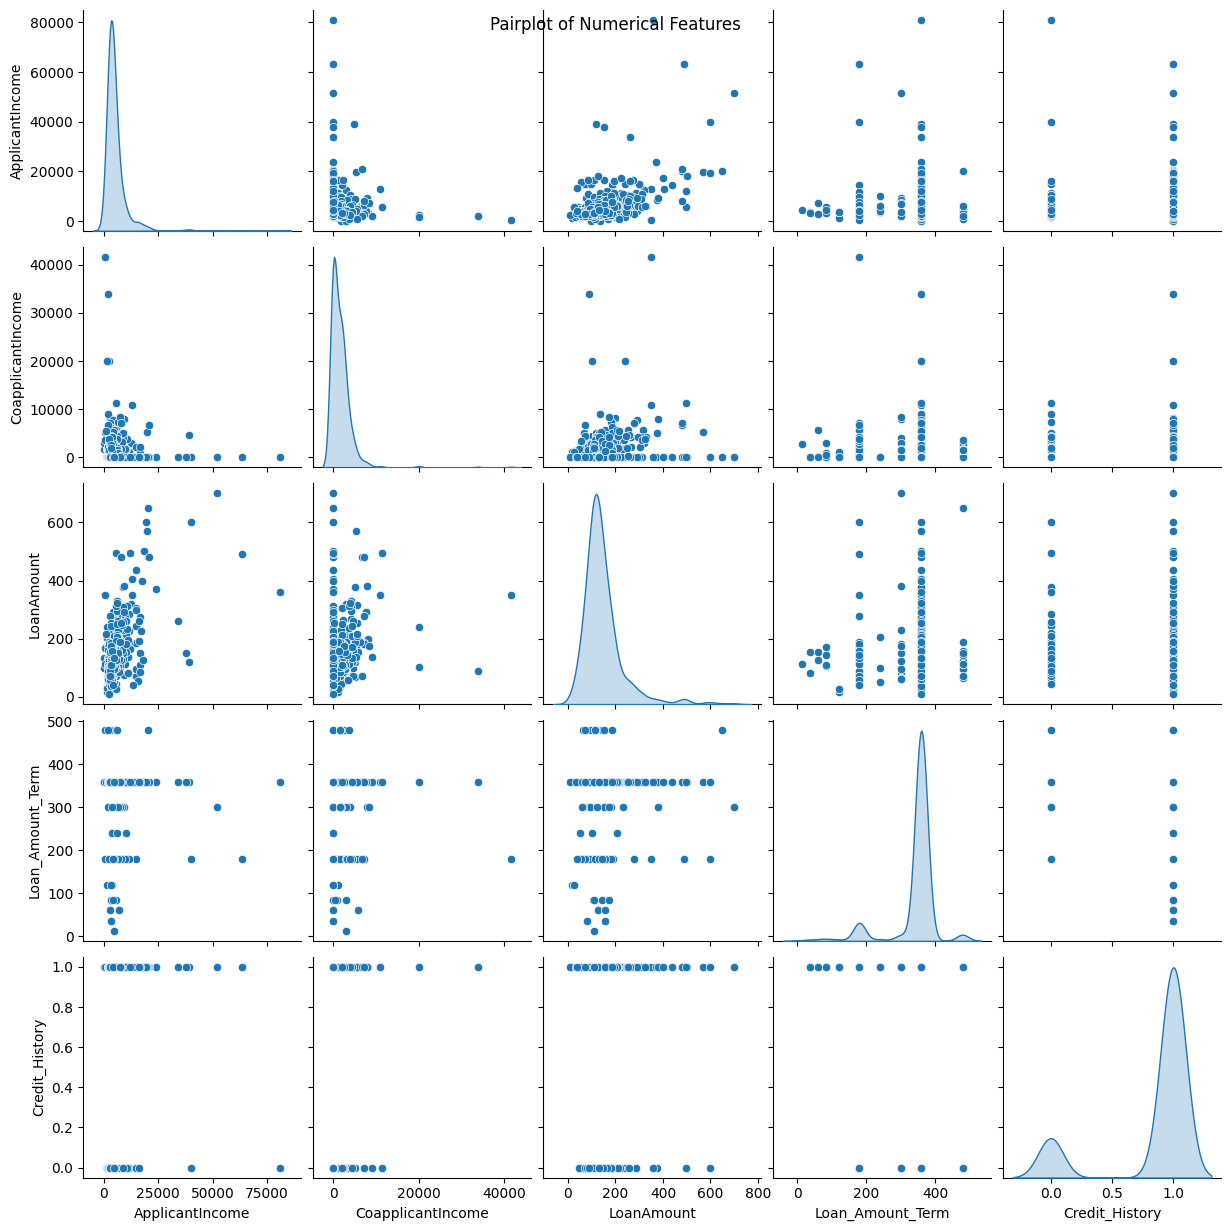

In [20]:
# Pairplot to visualize pairwise relationship in numerical features
plt.figure(figsize=(20,8))
sns.pairplot(df[numerical_columns], diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features')
plt.show()

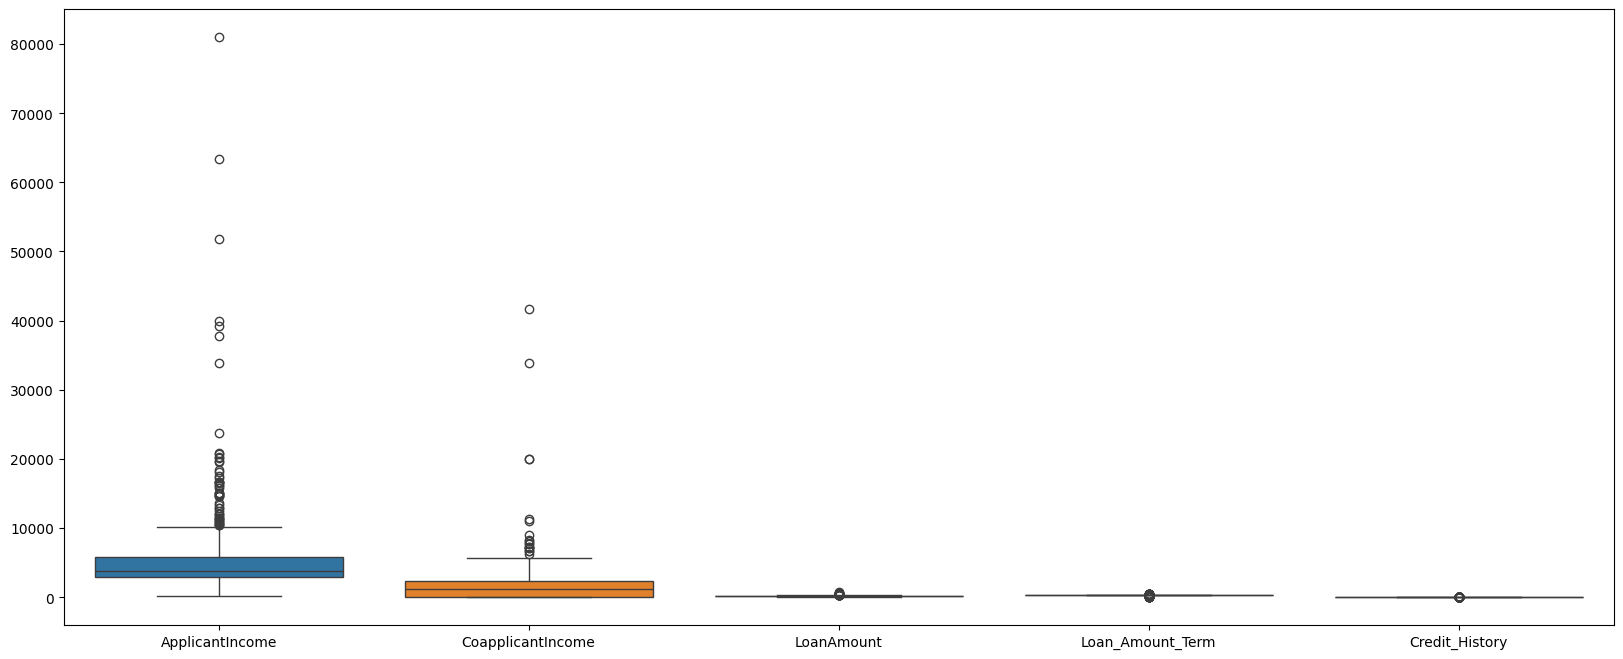

In [21]:
# Find the Outlier of the numerical data
plt.figure(figsize=(20,8))
sns.boxplot(df[numerical_columns])
plt.show()